In [ ]:
import pandas as pd
#import pyodbc
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
cnxn_str = ("Driver={SQL Server Native Client 11.0};"
            "Server=DESKTOP-I5U4737;"
            "Database=fait_finals;"
            "Trusted_Connection=yes;")

cnxn = pyodbc.connect(cnxn_str)

In [ ]:
fait_BM = pd.read_sql("SELECT * FROM [fait_BM_final]", cnxn)
fait_BM


,index,CodeBonusMalus_id,CodePolice_id,CodeVehicule_id,CodeAssure_id,codeUsage,ETAT_VEHICULE,DATE_AFFECTATION,classeBonusMalus,coefBonusMalus,...,typeImmatriculation_ES,typeImmatriculation_IT,typeImmatriculation_MC,typeImmatriculation_MD,typeImmatriculation_MOTO,typeImmatriculation_PAT,typeImmatriculation_REM,typeImmatriculation_RS,typeImmatriculation_TRAC,typeImmatriculation_TU
0,0,6591,6599,6389,5219,1,1,2018-07-31 00:00:00,1,70,...,0,0,0,0,0,0,0,0,0,1
1,1,6592,6600,6390,5220,1,1,2017-09-23 00:00:00,1,70,...,0,0,0,0,0,0,0,0,0,1
2,2,6593,6601,6391,5221,1,1,2017-09-27 00:00:00,1,70,...,0,0,0,0,0,0,0,0,0,1
3,3,6594,6602,6392,5222,1,1,2017-03-15 00:00:00,1,70,...,0,0,0,0,0,0,0,0,0,1
4,4,6595,6603,6393,5223,1,1,2016-08-10 00:00:00,1,70,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307356,1248955,1399604,1394634,477061,453661,2,1,2016-03-06 00:00:00,2,90,...,0,0,0,0,0,0,0,0,0,1
1307357,1248956,1399605,1394635,1080470,36330,1,1,2017-12-16 00:00:00,3,90,...,0,0,0,0,0,0,0,0,0,1
1307358,1248957,1399606,1394636,524001,497581,2,1,2017-03-08 00:00:00,1,80,...,0,0,0,0,0,0,0,0,0,1
1307359,1248958,1399607,1394637,1080471,36330,1,1,2017-12-16 00:00:00,6,140,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
fait_BM=fait_BM[fait_BM["Fraud"]==0]
fait_BM

,index,CodeBonusMalus_id,CodePolice_id,CodeVehicule_id,CodeAssure_id,codeUsage,ETAT_VEHICULE,DATE_AFFECTATION,classeBonusMalus,coefBonusMalus,...,typeImmatriculation_ES,typeImmatriculation_IT,typeImmatriculation_MC,typeImmatriculation_MD,typeImmatriculation_MOTO,typeImmatriculation_PAT,typeImmatriculation_REM,typeImmatriculation_RS,typeImmatriculation_TRAC,typeImmatriculation_TU
0,0,6591,6599,6389,5219,1,1,2018-07-31 00:00:00,1,70,...,0,0,0,0,0,0,0,0,0,1
1,1,6592,6600,6390,5220,1,1,2017-09-23 00:00:00,1,70,...,0,0,0,0,0,0,0,0,0,1
2,2,6593,6601,6391,5221,1,1,2017-09-27 00:00:00,1,70,...,0,0,0,0,0,0,0,0,0,1
3,3,6594,6602,6392,5222,1,1,2017-03-15 00:00:00,1,70,...,0,0,0,0,0,0,0,0,0,1
5,5,6596,6604,6394,5224,5,1,2017-11-22 00:00:00,1,80,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307354,1248953,1399602,1394632,477060,453660,1,1,2016-03-18 00:00:00,2,80,...,0,0,0,0,0,0,0,0,0,1
1307355,1248954,1399603,1394633,323570,1058814,1,1,2017-07-08 00:00:00,4,100,...,0,0,0,0,0,0,0,0,0,1
1307356,1248955,1399604,1394634,477061,453661,2,1,2016-03-06 00:00:00,2,90,...,0,0,0,0,0,0,0,0,0,1
1307358,1248957,1399606,1394636,524001,497581,2,1,2017-03-08 00:00:00,1,80,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
query = "SELECT CodeAssure_id,count(CodeSinistre_id) as num_accidents FROM fait_Sinistre_final where pourcentadeDeResponsabilite=100 And Fraud=0 group by CodeAssure_id"
num_accidents = pd.read_sql(query, cnxn)
num_accidents.CodeAssure_id = num_accidents.CodeAssure_id.astype(float)
num_accidents

,CodeAssure_id,num_accidents
0,511737.0,1
1,258591.0,1
2,337793.0,1
3,412974.0,2
4,691749.0,4
...,...,...
189048,1610444.0,1
189049,250362.0,1
189050,229323.0,1
189051,64004.0,1


In [ ]:
fait_BM = pd.merge(fait_BM,
                 num_accidents,
                 on='CodeAssure_id', 
                 how='left')

NameError: ignored

In [ ]:
fait_BM

,Unnamed: 0,index,CodeBonusMalus_id,CodePolice_id,CodeVehicule_id,CodeAssure_id,codeUsage,ETAT_VEHICULE,DATE_AFFECTATION,classeBonusMalus,coefBonusMalus,codeMarque,puissanceFiscal,dateInsertion,codeCompagnie,codeAgence,typeIntermediaire,naturePolice,typePolice,Fraud,energie_ELECTRICITE,energie_ESS-GAZ GPL,energie_ESS-GNC,energie_ESSENCE,energie_ESSENCE-ELECTRICITE,energie_GASOIL,energie_GAZ GPL,energie_unkown,Etat_Police_R,Etat_Police_S,Etat_Police_V,typeImmatriculation_AA,typeImmatriculation_CC,typeImmatriculation_CD,typeImmatriculation_CMD,typeImmatriculation_ES,typeImmatriculation_IT,typeImmatriculation_MC,typeImmatriculation_MD,typeImmatriculation_MOTO,typeImmatriculation_PAT,typeImmatriculation_REM,typeImmatriculation_RS,typeImmatriculation_TRAC,typeImmatriculation_TU,num_accidents
0,0,0,6591,6599,6389,5219,1,1,2018-07-31 00:00:00,1,70,808.0,4.0,2017-10-05,13.0,208.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,6592,6600,6390,5220,1,1,2017-09-23 00:00:00,1,70,107.0,4.0,2017-10-05,13.0,227.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2,6593,6601,6391,5221,1,1,2017-09-27 00:00:00,1,70,30.0,4.0,2017-10-05,13.0,227.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,3,6594,6602,6392,5222,1,1,2017-03-15 00:00:00,1,70,30.0,4.0,2017-10-05,13.0,208.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,5,6596,6604,6394,5224,5,1,2017-11-22 00:00:00,1,80,12.0,7.0,2017-12-28,13.0,208.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19836,19836,21307,63895,63872,59587,56046,1,1,2017-04-06 00:00:00,4,100,107.0,5.0,2017-10-05,8.0,61.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19837,19837,21308,63896,63873,59588,56047,1,1,2017-04-06 00:00:00,6,140,119.0,5.0,2017-10-05,8.0,82.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19838,19838,21309,63897,63874,59589,56048,1,1,2017-04-06 00:00:00,4,100,107.0,5.0,2017-10-05,8.0,36.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19839,19839,21310,63898,63875,59590,56049,5,1,2017-04-06 00:00:00,5,150,376.0,8.0,2017-10-05,8.0,68.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
fait_BM['num_accidents'] = fait_BM['num_accidents'].fillna(0)

In [ ]:
fait_BM['num_accidents'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  8.,  6.,  9., 10.,  7., 11., 12.,
       13.])

In [ ]:
fait_BM.to_csv("fait_BM_accident.csv")


In [ ]:
fait_BM=pd.read_csv("C:\\Users\\Hamza Mlaouhi\\Desktop\\fait_BM_accident.csv")
#fait_BM=pd.read_csv("fait_BM_accident.csv")

In [ ]:
BM=fait_BM.drop(["Unnamed: 0",'index','CodeBonusMalus_id','CodePolice_id','CodeVehicule_id','CodeAssure_id','DATE_AFFECTATION','dateInsertion'
               ,'typeImmatriculation_MC','Fraud','ETAT_VEHICULE']
               , axis=1)

In [ ]:
BM=BM.dropna()

In [ ]:
BM

,codeUsage,classeBonusMalus,coefBonusMalus,codeMarque,puissanceFiscal,codeCompagnie,codeAgence,typeIntermediaire,naturePolice,typePolice,...,typeImmatriculation_ES,typeImmatriculation_IT,typeImmatriculation_MD,typeImmatriculation_MOTO,typeImmatriculation_PAT,typeImmatriculation_REM,typeImmatriculation_RS,typeImmatriculation_TRAC,typeImmatriculation_TU,num_accidents
0,1,1,70,808.0,4.0,13.0,208,3.0,0,1,...,0,0,0,0,0,0,0,0,1,0.0
1,1,1,70,107.0,4.0,13.0,227,3.0,0,1,...,0,0,0,0,0,0,0,0,1,0.0
2,1,1,70,30.0,4.0,13.0,227,3.0,0,1,...,0,0,0,0,0,0,0,0,1,0.0
3,1,1,70,30.0,4.0,13.0,208,3.0,0,1,...,0,0,0,0,0,0,0,0,1,0.0
4,5,1,80,12.0,7.0,13.0,208,3.0,0,1,...,0,0,0,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197092,1,2,80,107.0,4.0,7.0,83,2.0,0,1,...,0,0,0,0,0,0,0,0,1,1.0
1197093,1,4,100,93.0,15.0,9.0,308,1.0,0,1,...,0,0,0,0,0,0,0,0,1,1.0
1197094,2,2,90,12.0,8.0,7.0,180,2.0,0,1,...,0,0,0,0,0,0,0,0,1,0.0
1197095,2,1,80,646.0,8.0,7.0,79,2.0,0,1,...,0,0,0,0,0,0,0,0,1,0.0


In [ ]:
#to see the variation of every column
BM.describe()

,codeUsage,classeBonusMalus,coefBonusMalus,codeMarque,puissanceFiscal,codeCompagnie,codeAgence,typeIntermediaire,naturePolice,typePolice,...,typeImmatriculation_ES,typeImmatriculation_IT,typeImmatriculation_MD,typeImmatriculation_MOTO,typeImmatriculation_PAT,typeImmatriculation_REM,typeImmatriculation_RS,typeImmatriculation_TRAC,typeImmatriculation_TU,num_accidents
count,1.197097e+06,1.197097e+06,1.197097e+06,1.197097e+06,1.197097e+06,1.197097e+06,1.197097e+06,1.197097e+06,1.197097e+06,1.197097e+06,...,1.197097e+06,1.197097e+06,1.197097e+06,1.197097e+06,1.197097e+06,1.197097e+06,1.197097e+06,1.197097e+06,1.197097e+06,1.197097e+06
mean,2.353098e+00,3.344922e+00,1.068538e+02,1.543777e+02,6.622629e+00,8.511750e+00,4.007646e+02,1.328730e+00,1.120243e-01,9.949311e-01,...,2.606305e-03,8.353542e-07,1.077607e-04,4.176771e-06,1.102668e-04,3.891080e-03,2.873201e-02,1.101247e-02,9.531467e-01,1.892035e-01
std,2.521127e+00,2.205659e+00,4.076151e+01,2.793281e+02,8.896666e+00,4.990949e+00,8.986461e+02,5.505328e-01,3.153965e-01,7.101577e-02,...,5.098543e-02,9.139771e-04,1.038023e-02,2.043712e-03,1.050022e-02,6.225707e-02,1.670524e-01,1.043610e-01,2.113247e-01,5.403867e-01
min,1.000000e+00,1.000000e+00,7.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,8.000000e+01,3.000000e+01,5.000000e+00,2.000000e+00,1.130000e+02,1.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,1.000000e+00,3.000000e+00,9.000000e+01,1.050000e+02,6.000000e+00,1.000000e+01,2.490000e+02,1.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,3.000000e+00,4.000000e+00,1.200000e+02,1.770000e+02,8.000000e+00,1.400000e+01,7.000000e+02,2.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,1.700000e+01,1.100000e+01,3.500000e+02,1.001000e+04,8.740000e+03,1.500000e+01,1.040050e+05,3.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01


In [ ]:
BM.var()

codeUsage                      6.356082e+00
classeBonusMalus               4.864932e+00
coefBonusMalus                 1.661501e+03
codeMarque                     7.802421e+04
puissanceFiscal                7.915067e+01
codeCompagnie                  2.490957e+01
codeAgence                     8.075649e+05
typeIntermediaire              3.030863e-01
naturePolice                   9.947497e-02
typePolice                     5.043239e-03
energie_ELECTRICITE            1.670707e-06
energie_ESS-GAZ GPL            2.519732e-03
energie_ESS-GNC                4.176757e-06
energie_ESSENCE                2.488948e-01
energie_ESSENCE-ELECTRICITE    2.506058e-06
energie_GASOIL                 2.484235e-01
energie_GAZ  GPL               0.000000e+00
energie_unkown                 3.909924e-03
Etat_Police_R                  1.564291e-01
Etat_Police_S                  6.943034e-03
Etat_Police_V                  1.606578e-01
typeImmatriculation_AA         1.319687e-04
typeImmatriculation_CC         1

In [ ]:
BM=BM.drop(["energie_GAZ  GPL","energie_ESSENCE-ELECTRICITE","typeImmatriculation_IT","typeImmatriculation_MOTO","energie_ELECTRICITE", "energie_ESS-GNC"]
               , axis=1)

In [ ]:
BM

,codeUsage,classeBonusMalus,coefBonusMalus,codeMarque,puissanceFiscal,codeCompagnie,codeAgence,typeIntermediaire,naturePolice,typePolice,...,typeImmatriculation_CD,typeImmatriculation_CMD,typeImmatriculation_ES,typeImmatriculation_MD,typeImmatriculation_PAT,typeImmatriculation_REM,typeImmatriculation_RS,typeImmatriculation_TRAC,typeImmatriculation_TU,num_accidents
0,1,1,70,808.0,4.0,13.0,208,3.0,0,1,...,0,0,0,0,0,0,0,0,1,0.0
1,1,1,70,107.0,4.0,13.0,227,3.0,0,1,...,0,0,0,0,0,0,0,0,1,0.0
2,1,1,70,30.0,4.0,13.0,227,3.0,0,1,...,0,0,0,0,0,0,0,0,1,0.0
3,1,1,70,30.0,4.0,13.0,208,3.0,0,1,...,0,0,0,0,0,0,0,0,1,0.0
4,5,1,80,12.0,7.0,13.0,208,3.0,0,1,...,0,0,0,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197092,1,2,80,107.0,4.0,7.0,83,2.0,0,1,...,0,0,0,0,0,0,0,0,1,1.0
1197093,1,4,100,93.0,15.0,9.0,308,1.0,0,1,...,0,0,0,0,0,0,0,0,1,1.0
1197094,2,2,90,12.0,8.0,7.0,180,2.0,0,1,...,0,0,0,0,0,0,0,0,1,0.0
1197095,2,1,80,646.0,8.0,7.0,79,2.0,0,1,...,0,0,0,0,0,0,0,0,1,0.0


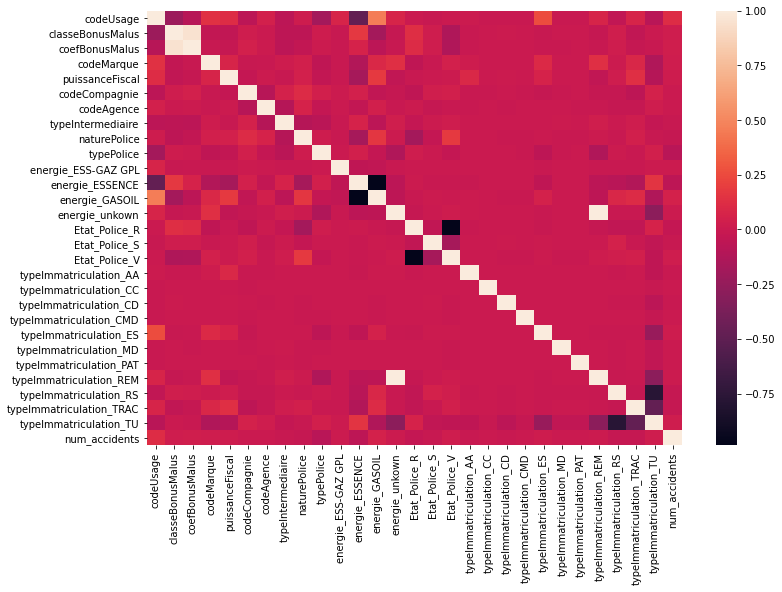

In [ ]:
#Correlation with the targuet and correlation*
fig_dims=(12,8)
fig,ax=plt.subplots(figsize=fig_dims)
sns.heatmap(BM.corr(),ax=ax)
plt.show()

In [ ]:
#correlation with classe bonus malus
abs(BM.corr()["classeBonusMalus"])

codeUsage                   0.211821
classeBonusMalus            1.000000
coefBonusMalus              0.951241
codeMarque                  0.034533
puissanceFiscal             0.045602
codeCompagnie               0.023627
codeAgence                  0.006427
typeIntermediaire           0.063132
naturePolice                0.061977
typePolice                  0.017338
energie_ESS-GAZ GPL         0.012864
energie_ESSENCE             0.176144
energie_GASOIL              0.172077
energie_unkown              0.023475
Etat_Police_R               0.128113
Etat_Police_S               0.028499
Etat_Police_V               0.132340
typeImmatriculation_AA      0.005258
typeImmatriculation_CC      0.001898
typeImmatriculation_CD      0.007069
typeImmatriculation_CMD     0.000745
typeImmatriculation_ES      0.015890
typeImmatriculation_MD      0.000821
typeImmatriculation_PAT     0.005499
typeImmatriculation_REM     0.023413
typeImmatriculation_RS      0.037379
typeImmatriculation_TRAC    0.040356
t

In [ ]:
l=[]
i=0
j=0
for e in abs(BM.corr()["classeBonusMalus"]):
  j=j+1
  e=i+e-1
 
print(abs(e/j))
print(abs(BM.corr()["classeBonusMalus"]).median())



0.03357019974044875
0.02646420752698609


In [ ]:
 abs(BM.corr()["classeBonusMalus"][abs( abs(BM.corr()["classeBonusMalus"])>0.01)].drop("classeBonusMalus")).index.tolist()


['codeUsage',
 'coefBonusMalus',
 'codeMarque',
 'puissanceFiscal',
 'codeCompagnie',
 'typeIntermediaire',
 'naturePolice',
 'typePolice',
 'energie_ESS-GAZ GPL',
 'energie_ESSENCE',
 'energie_GASOIL',
 'energie_unkown',
 'Etat_Police_R',
 'Etat_Police_S',
 'Etat_Police_V',
 'typeImmatriculation_ES',
 'typeImmatriculation_REM',
 'typeImmatriculation_RS',
 'typeImmatriculation_TRAC',
 'num_accidents']

In [ ]:
data=BM.drop(['codeUsage','coefBonusMalus','codeMarque','puissanceFiscal','codeCompagnie','typeIntermediaire','naturePolice','typePolice','energie_ESS-GAZ GPL','energie_ESSENCE','energie_GASOIL','energie_unkown','Etat_Police_R','Etat_Police_S','Etat_Police_V','typeImmatriculation_ES','typeImmatriculation_REM','typeImmatriculation_RS','typeImmatriculation_TRAC'],axis=1)
data.columns
BM=BM.drop([ 'codeAgence', 'typeImmatriculation_AA',
       'typeImmatriculation_CC', 'typeImmatriculation_CD',
       'typeImmatriculation_CMD', 'typeImmatriculation_MD',
       'typeImmatriculation_PAT', 'typeImmatriculation_TU'],axis=1)


In [ ]:
BM
print(BM.columns)

Index(['codeUsage', 'classeBonusMalus', 'coefBonusMalus', 'codeMarque',
       'puissanceFiscal', 'codeCompagnie', 'typeIntermediaire', 'naturePolice',
       'typePolice', 'energie_ESS-GAZ GPL', 'energie_ESSENCE',
       'energie_GASOIL', 'energie_unkown', 'Etat_Police_R', 'Etat_Police_S',
       'Etat_Police_V', 'typeImmatriculation_ES', 'typeImmatriculation_REM',
       'typeImmatriculation_RS', 'typeImmatriculation_TRAC', 'num_accidents'],
      dtype='object')


In [ ]:
#forward selection backward selection
from sklearn.linear_model import LogisticRegression as Lg
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(estimator=knn, 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
BM.dtypes

codeUsage                   float64
classeBonusMalus            float64
coefBonusMalus              float64
codeMarque                  float64
puissanceFiscal             float64
codeCompagnie               float64
typeIntermediaire           float64
naturePolice                float64
typePolice                  float64
energie_ESS-GAZ GPL         float64
energie_ESSENCE             float64
energie_GASOIL              float64
energie_unkown              float64
Etat_Police_R               float64
Etat_Police_S               float64
Etat_Police_V               float64
typeImmatriculation_ES      float64
typeImmatriculation_REM     float64
typeImmatriculation_RS      float64
typeImmatriculation_TRAC    float64
num_accidents               float64
dtype: object

In [ ]:
d=BM.sample(300000)
X=d.drop(["classeBonusMalus"],axis=1)
y=d["classeBonusMalus"]


In [ ]:
sfs1.fit(X,y)
sfs1.subsets

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
print(X.shape)
X

(10000, 20)


array([[-0.54, -0.9 , -0.17, ..., -0.16, -0.07, -0.36],
       [-0.54,  2.35, -0.19, ..., -0.16, -0.07, -0.36],
       [-0.54, -0.65, -0.52, ..., -0.16, -0.07, -0.36],
       ...,
       [ 3.77, -0.65, -0.52, ..., -0.16, -0.07, -0.36],
       [ 1.03, -0.15, -0.22, ..., -0.16, -0.07, -0.36],
       [ 0.25, -0.15,  1.04, ..., -0.16, -0.07, -0.36]])

c:\users\hamza mlaouhi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\hamza mlaouhi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\hamza mlaouhi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\hamza mlaouhi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\hamza mlaouhi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density esti

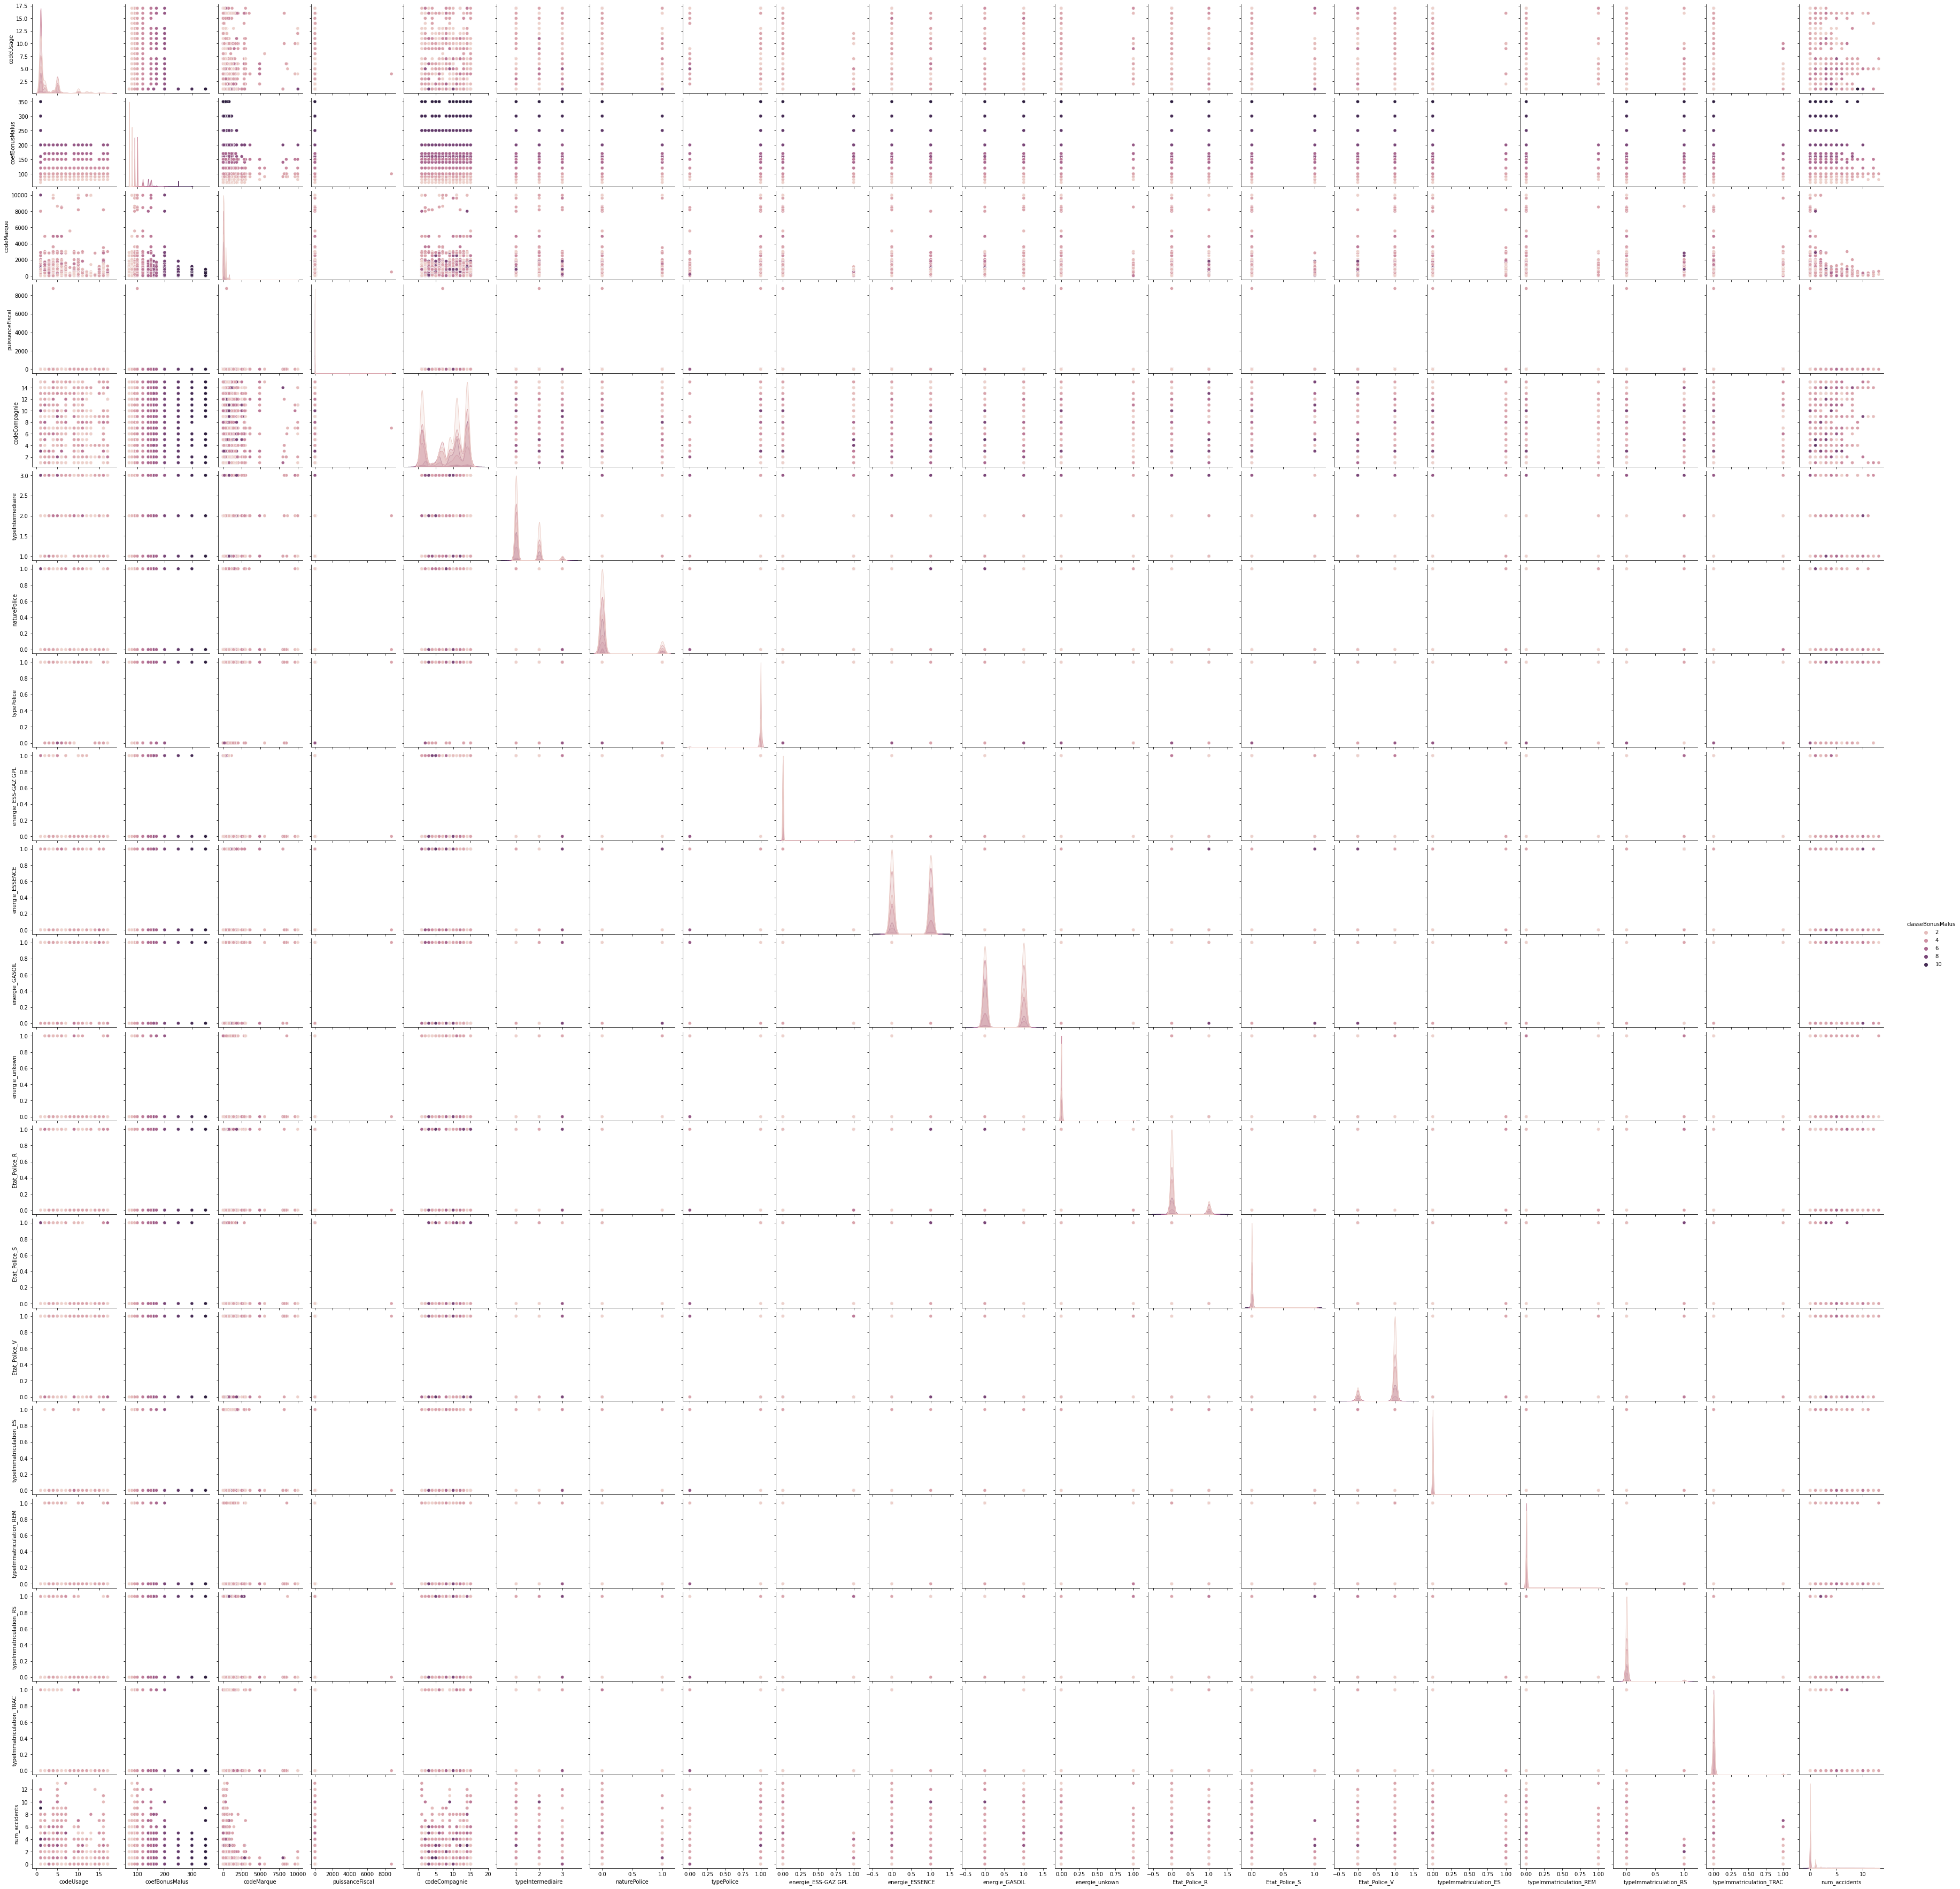

In [ ]:
d=BM.sample(300000)
sns.pairplot(d,hue="classeBonusMalus")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=12)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (240000, 20) (240000,)
Test set: (60000, 20) (60000,)


#KNN

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Erreur')

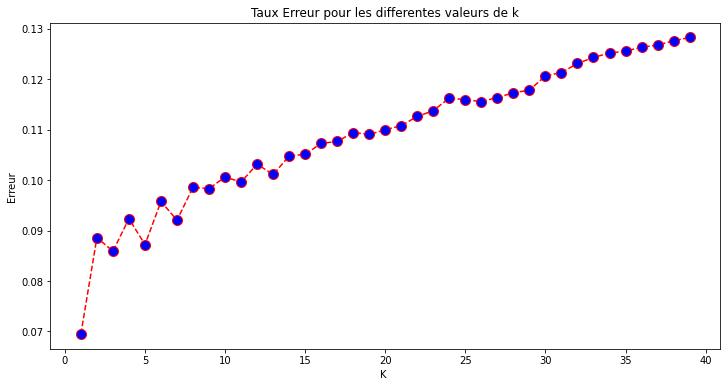

In [ ]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')


In [ ]:
knn = KNeighborsClassifier(1)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [ ]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.92


#SVM

In [ ]:
d=BM
d

,codeUsage,classeBonusMalus,coefBonusMalus,codeMarque,puissanceFiscal,codeCompagnie,typeIntermediaire,naturePolice,typePolice,energie_ESS-GAZ GPL,...,energie_GASOIL,energie_unkown,Etat_Police_R,Etat_Police_S,Etat_Police_V,typeImmatriculation_ES,typeImmatriculation_REM,typeImmatriculation_RS,typeImmatriculation_TRAC,num_accidents
16589,1,4,100,119.0,4.0,9.0,1.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0.0
335084,1,5,120,29.0,6.0,1.0,1.0,0,1,0,...,1,0,0,0,1,0,0,0,0,0.0
444055,1,4,100,30.0,5.0,1.0,1.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0.0
108374,1,4,100,119.0,5.0,12.0,3.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0.0
291609,1,7,160,30.0,5.0,2.0,2.0,0,1,0,...,1,0,0,0,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216806,1,6,140,501.0,5.0,9.0,3.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0.0
228675,1,2,80,107.0,4.0,9.0,1.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0.0
1190912,1,6,140,119.0,4.0,9.0,1.0,0,1,0,...,0,0,0,0,1,0,0,0,0,1.0
1004811,1,1,70,119.0,4.0,11.0,2.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0.0


In [ ]:

X=d.drop(["classeBonusMalus"],axis=1)
y=d["classeBonusMalus"]

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=12)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=12)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (957677, 20) (957677,)
Test set: (239420, 20) (239420,)


In [ ]:
from sklearn import svm


In [ ]:
# Kernel linéaire
clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_train) 
yhat_1 = clf.predict(X_test)
from sklearn.metrics import f1_score
print("f1_score:",f1_score(y_test, yhat_1, average='weighted'))
from sklearn.metrics import jaccard_similarity_score
print("jaccard_score:",jaccard_similarity_score(y_test, yhat_2))

f1_score: 0.9813465633676697


In [ ]:
# Kernel poly
clf = svm.SVC(kernel="poly")
clf.fit(X_train, y_train) 
yhat_2 = clf.predict(X_test)
from sklearn.metrics import f1_score
print("f1_score:",f1_score(y_test, yhat_1, average='weighted'))
from sklearn.metrics import jaccard_similarity_score
print("jaccard_score:",jaccard_similarity_score(y_test, yhat_2))

f1_score: 0.9488547640866365
jaccard_score: 0.9495


In [ ]:
# Kernel sigmoid
clf = svm.SVC(kernel="sigmoid")
clf.fit(X_train, y_train) 
yhat_3 = clf.predict(X_test)
from sklearn.metrics import f1_score
print("f1_score:",f1_score(y_test, yhat_3, average='weighted'))
#from sklearn.metrics import jaccard_similarity_score
#print("jaccard_score:",jaccard_similarity_score(y_test, yhat_3))

f1_score: 0.6688818917247539


In [ ]:
# Kernel rbf (Par défaut)

clf = svm.SVC(kernel="rbf")
clf.fit(X_train, y_train) 
yhat_4 = clf.predict(X_test)
from sklearn.metrics import f1_score
print("f1_score:",f1_score(y_test, yhat_4, average='weighted'))
#from sklearn.metrics import jaccard_similarity_score
#print("jaccard_score:",jaccard_similarity_score(y_test, yhat_4))

f1_score: 0.9735360997459216


#Logistic Regression


In [ ]:
d=BM
X=d.drop(["classeBonusMalus"],axis=1)
y=d["classeBonusMalus"]

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=12)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (957677, 20) (957677,)
Test set: (239420, 20) (239420,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
yhat = LR.predict(X_test)


In [ ]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.6633609292114356

In [ ]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           1       0.70      1.00      0.82      1784
           2       0.02      0.00      0.01       631
           3       0.46      0.30      0.37       675
           4       0.57      0.64      0.61       444
           5       0.65      0.52      0.58       196
           6       0.00      0.00      0.00        58
           7       0.00      0.00      0.00        27
           8       0.61      0.89      0.72       121
           9       0.00      0.00      0.00        22
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         3

    accuracy                           0.63      3968
   macro avg       0.27      0.31      0.28      3968
weighted avg       0.51      0.63      0.55      3968



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Tensorflow



In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout
from tensorflow.keras import layers,regularizers
from keras.models import Sequential
from keras.layers import Flatten


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


#Sequential 
#Keras Multi Class Classification

In [ ]:
d=BM
X=d.drop(["classeBonusMalus"],axis=1)
y=d["classeBonusMalus"]

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=12)



In [ ]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (957677, 20) (957677,)
Test set: (239420, 20) (239420,)


In [ ]:
input1=X_train.shape[0]*X_train.shape[1]
input1
X_train[0]

array([-0.53670395, -0.90413217, -0.44885455,  0.04241717, -1.50507505,
        1.21930988, -0.35518586,  0.07137755, -0.05032403,  0.93557406,
       -0.92350055, -0.06277578,  2.037601  , -0.08391153, -1.99316231,
       -0.05111864, -0.06250024, -0.17199406, -0.10552298, -0.35012635])

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
output = y_test.shape[1]
y_test[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
keras.backend.clear_session()

In [ ]:
# create model
def classification_model():
    model = Sequential()
    model.add(Dense(200, activation='relu', input_shape=(20,),
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(200, activation='relu', 
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(output, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


     

In [ ]:
# create model
def classification_small_model():
    model = Sequential()
    model.add(Dense(15, activation='relu', input_shape=(20,),
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(15, activation='relu', 
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(output, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model1=classification_model()
model2=classification_small_model()

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 200)               4200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 12)                2412      
Total params: 46,812
Trainable params: 46,812
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 15)                315       
_________________________________________________________________
dropout_3 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 15)                240       
_________________________________________________________________
dropout_4 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 12)                192       
Total params: 747
Trainable params: 747
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2=model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, verbose=2)


Epoch 1/5
29928/29928 - 29s - loss: 0.7890 - accuracy: 0.7095 - val_loss: 0.3260 - val_accuracy: 0.9317
Epoch 2/5
29928/29928 - 27s - loss: 0.6024 - accuracy: 0.7801 - val_loss: 0.3185 - val_accuracy: 0.9215
Epoch 3/5
29928/29928 - 27s - loss: 0.5742 - accuracy: 0.7923 - val_loss: 0.2961 - val_accuracy: 0.9444
Epoch 4/5
29928/29928 - 27s - loss: 0.5654 - accuracy: 0.8001 - val_loss: 0.2715 - val_accuracy: 0.9539
Epoch 5/5
29928/29928 - 27s - loss: 0.5697 - accuracy: 0.8054 - val_loss: 0.2706 - val_accuracy: 0.9564


(<Figure size 720x360 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

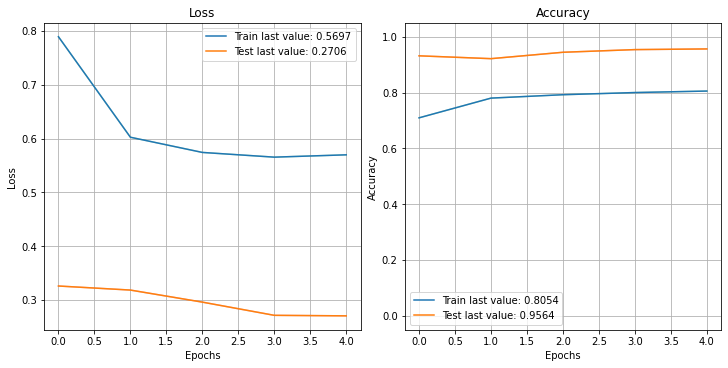

In [ ]:
from plot_keras_history import plot_history
plot_history(history2.history)

In [ ]:
scores = model2.evaluate(X_test, y_test, verbose=2)
print('Accuracy: {} \n Error: {}'.format(scores[1], 1 - scores[1]))

7482/7482 - 4s - loss: 0.2706 - accuracy: 0.9564
Accuracy: 0.9563737511634827 
 Error: 0.043626248836517334


In [ ]:
history1=model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, verbose=2)


Epoch 1/5
29928/29928 - 54s - loss: 0.1754 - accuracy: 0.9619 - val_loss: 0.0664 - val_accuracy: 0.9964
Epoch 2/5
29928/29928 - 52s - loss: 0.1001 - accuracy: 0.9861 - val_loss: 0.0634 - val_accuracy: 0.9983
Epoch 3/5
29928/29928 - 50s - loss: 0.0974 - accuracy: 0.9874 - val_loss: 0.0629 - val_accuracy: 0.9979
Epoch 4/5
29928/29928 - 53s - loss: 0.0940 - accuracy: 0.9882 - val_loss: 0.0608 - val_accuracy: 0.9983
Epoch 5/5
29928/29928 - 52s - loss: 0.0937 - accuracy: 0.9887 - val_loss: 0.0653 - val_accuracy: 0.9960


(<Figure size 720x360 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

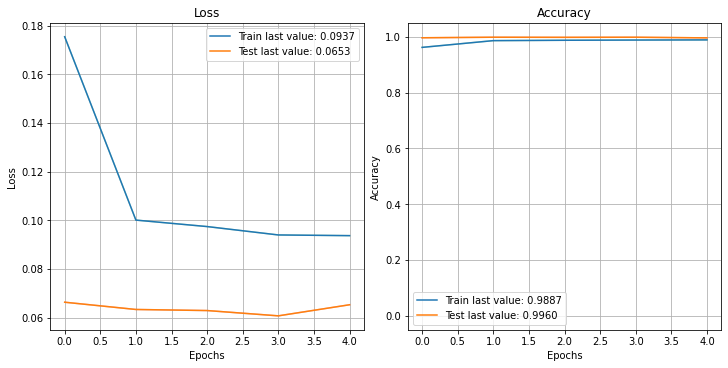

In [ ]:
from plot_keras_history import plot_history
plot_history(history1.history)

In [ ]:
scores = model1.evaluate(X_test, y_test, verbose=2)
print('Accuracy: {} \n Error: {}'.format(scores[1], 1 - scores[1]))

7482/7482 - 4s - loss: 0.0071 - accuracy: 0.9974
Accuracy: 0.9973728060722351 
 Error: 0.0026271939277648926
